In [239]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
current_dir = os.getcwd()
src_path = os.path.join(current_dir, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

import viz
import grid
import cell
import FVM

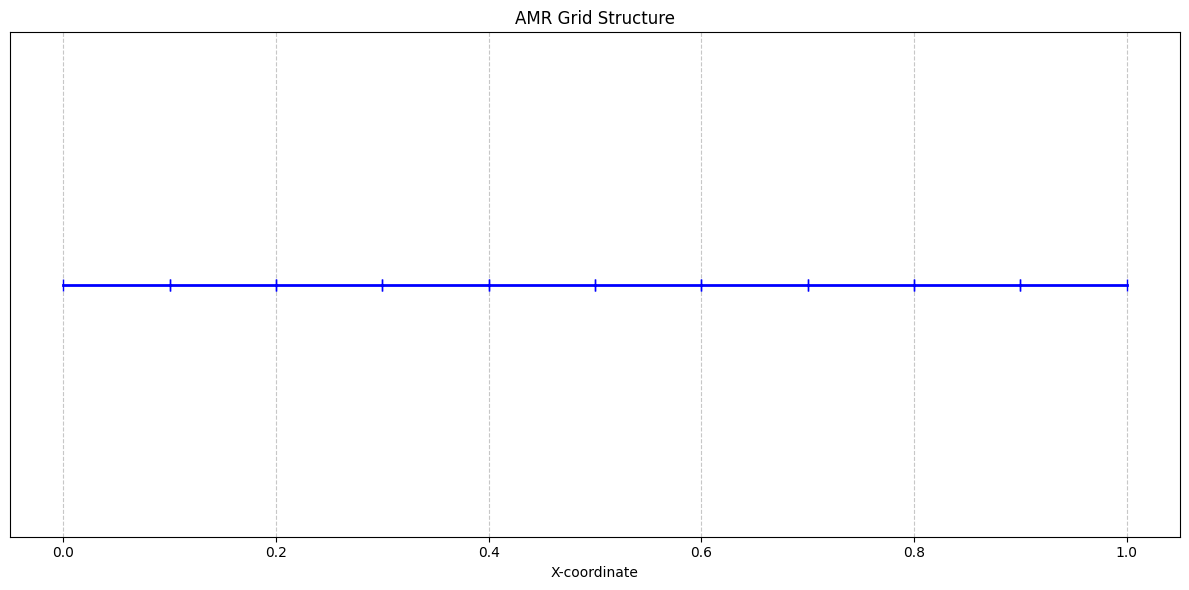

In [156]:
grid0 = grid.grid(1, 10)
viz.plot_amr_grid(grid0)

In [166]:
# Initialize the grid with Sod Rod Problem
def init_grid(grid):
    active_cells = grid.get_all_active_cells()

    if not active_cells:
        print("No active cells found to initialize.")
        return

    cell_x_coords = np.array([cell.x for cell in active_cells])

    all_prims_array = np.empty((len(active_cells), 3), dtype=float)

    state_left = np.array([1.0, 0.0, 1.0])
    state_right = np.array([0.125, 0.0, 0.1])

    mask = cell_x_coords < 0.5

    all_prims_array[mask] = state_left
    all_prims_array[~mask] = state_right 

    grid.update(all_prims_array)

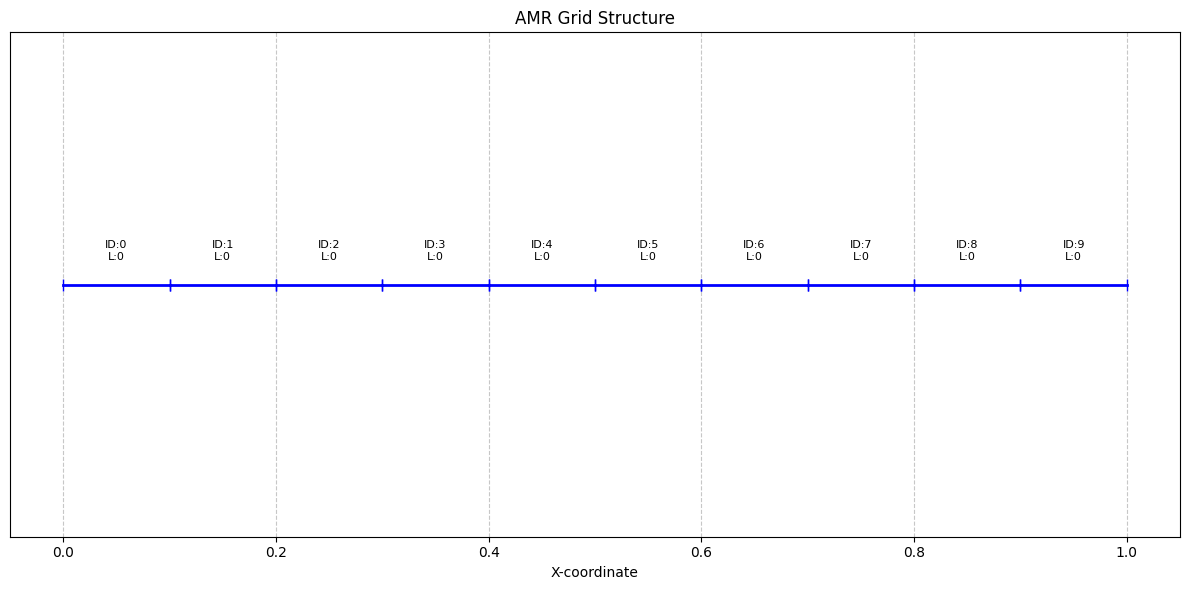

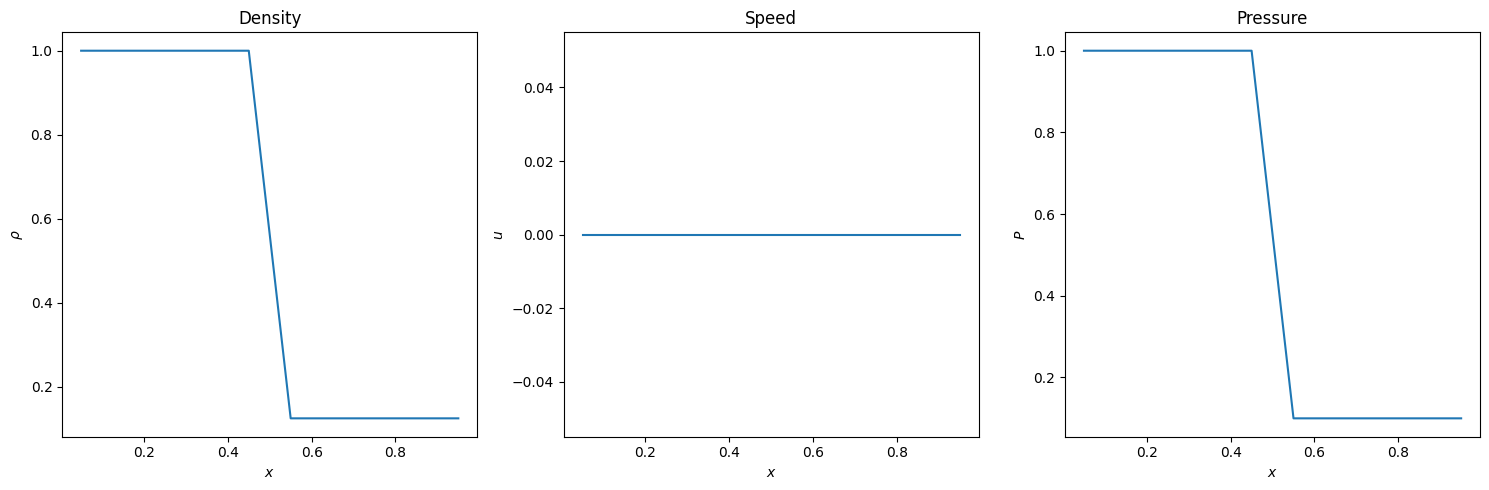

In [167]:
grid0 = grid.grid(1, 10)
init_grid(grid0)

viz.plot_amr_grid(grid0, label=True)
viz.plot_amr_value(grid0)

Timestep: 0 s
Timestep: 0.00845154254728515 s
Timestep: 0.0169030850945703 s
Timestep: 0.025354627641855452 s
Timestep: 0.0338061701891406 s
Timestep: 0.04225771273642576 s
Timestep: 0.05070925528371091 s
Timestep: 0.059160797830996065 s
Timestep: 0.06761234037828122 s
Timestep: 0.07606388292556637 s
Timestep: 0.08451542547285153 s
Timestep: 0.09296696802013668 s
Timestep: 0.10141851056742184 s
Timestep: 0.10987005311470699 s
Timestep: 0.11832159566199214 s
Timestep: 0.1267731382092773 s
Timestep: 0.13522468075656244 s
Timestep: 0.14367622330384758 s
Timestep: 0.15212776585113272 s
Timestep: 0.16057930839841786 s
Timestep: 0.169030850945703 s
Timestep: 0.17748239349298814 s
Timestep: 0.18593393604027328 s
Timestep: 0.19438547858755842 s
FINISHED


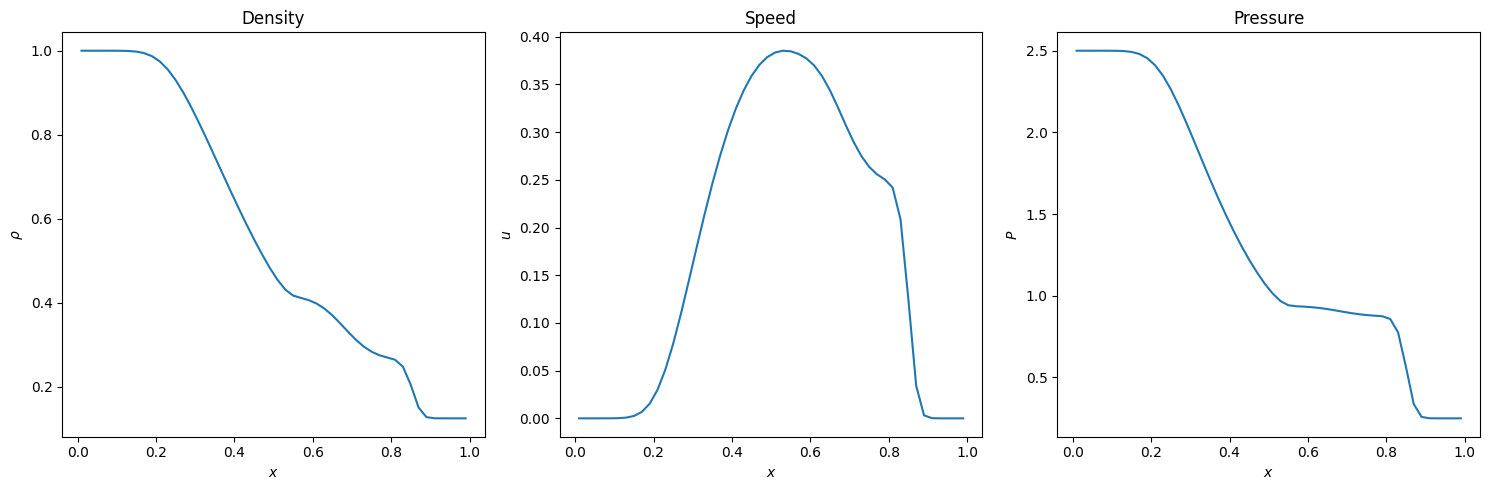

In [ ]:
grid1 = grid.grid(L=1, N=50)
init_grid(grid1)
grid1_history = FVM.solve(FVM.HLL_flux, grid1, 1)
viz.plot_amr_value(grid1)
viz.animate(grid1_history)

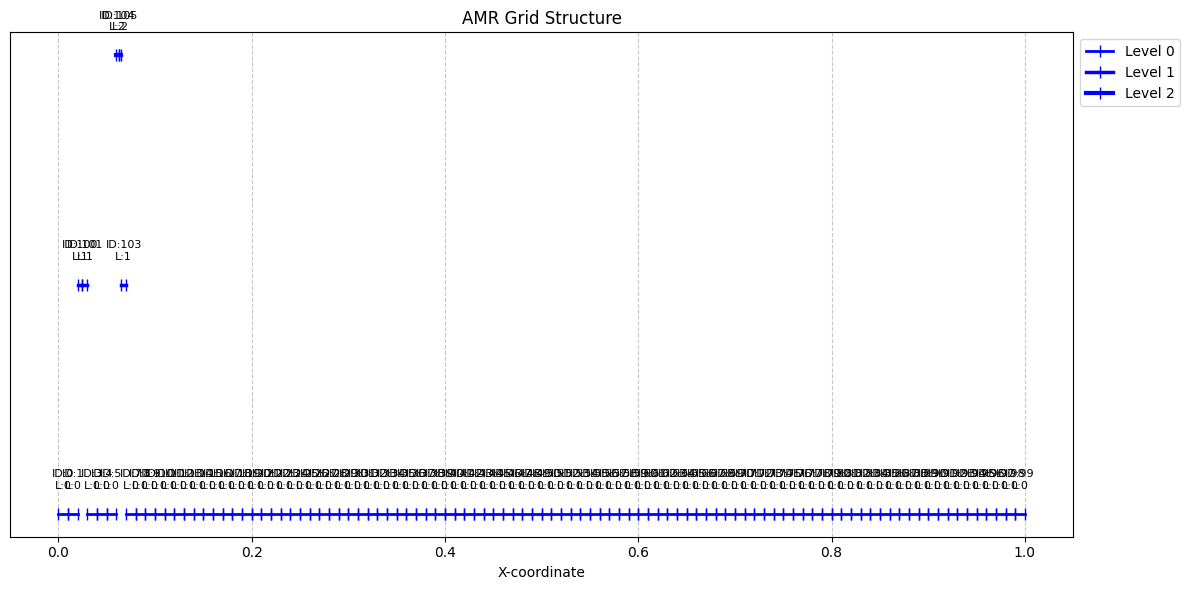

Timestep: 0 s
Timestep: 0.0010564428184106466 s
Timestep: 0.0021128856368212933 s
Timestep: 0.0031693284552319397 s
Timestep: 0.004225771273642587 s
Timestep: 0.0052822140920532334 s
Timestep: 0.00633865691046388 s
Timestep: 0.007395099728874527 s
Timestep: 0.008451542547285173 s
Timestep: 0.00950798536569582 s
Timestep: 0.010564428184106465 s
Timestep: 0.011620871002517111 s
Timestep: 0.012677313820927757 s
Timestep: 0.013733756639338403 s
Timestep: 0.01479019945774905 s
Timestep: 0.015846642276159697 s
Timestep: 0.016903085094570343 s
Timestep: 0.01795952791298099 s
Timestep: 0.019015970731391635 s
Timestep: 0.02007241354980228 s
Timestep: 0.021128856368212927 s
Timestep: 0.022185299186623573 s
Timestep: 0.02324174200503422 s
Timestep: 0.024298184823444865 s
Timestep: 0.02535462764185551 s
Timestep: 0.026411070460266157 s
Timestep: 0.027467513278676803 s
Timestep: 0.02852395609708745 s
Timestep: 0.029580398915498095 s
Timestep: 0.03063684173390874 s
Timestep: 0.03169328455231939 s
Ti

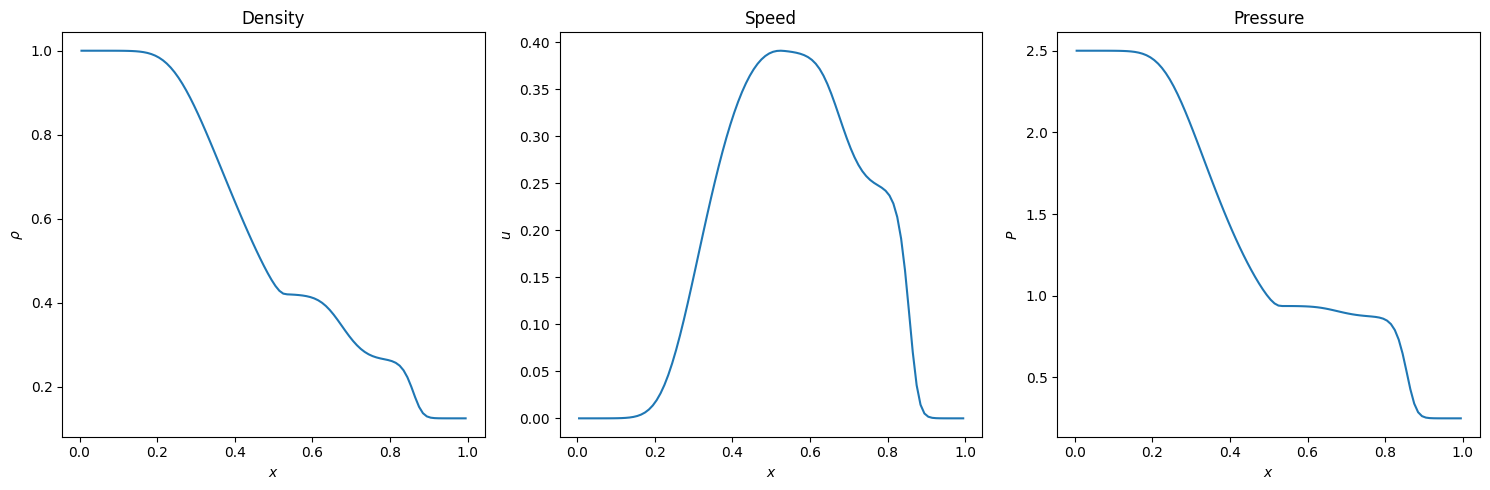

In [234]:
grid2 = grid.grid(L=1, N=100)
grid2.refine_cell(2)
grid2.refine_cell(6)
grid2.refine_cell(102)
viz.plot_amr_grid(grid2, label=True)

init_grid(grid2)
FVM.solve(FVM.HLL_flux, grid2, 0.2)
viz.plot_amr_value(grid2)